In [13]:
#pip install pydicom

In [14]:
import sys
import os 
import matplotlib.pyplot as plt
import cv2
import numpy as np

utils_path = os.path.join(os.getcwd(), 'Histogram_Thresholding', 'Helpers')
HistThresh_path = os.path.join(os.getcwd(), 'Histogram_Thresholding')
sys.path.append(utils_path)
sys.path.append(HistThresh_path)

import DicomReader
import Smoothing
import Otsu_Thresh
import Connected_Comp_Anal

# Load Image and Plot

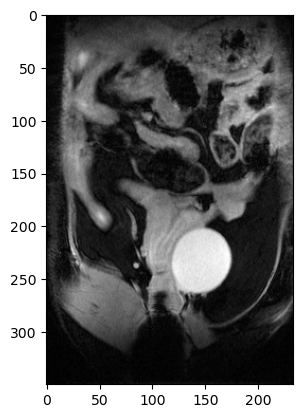

In [15]:
#Get image Path
ImgPath = "C:/Users/aorr3/VScode/20250421_153327_AWJ24CZBIOHUB_1_AWJ24CZBIOHUB_24_1_24/20250421_153327_AWJ24CZBIOHUB_1_AWJ24CZBIOHUB_24_1_24/3/pdata/2/dicom/AWJ24CZBIOHUB_1_AWJ24CZBIOHUB_1_AWJ24CZBIOHUB_24_E3_P2_EnIm1.dcm"
ImgPath2 = "C:/Users/aorr3/VScode/20250310_141009_AWJ24CZBIOHUB_1_AWJ24CZBIOHUB_11_1_11/20250310_141009_AWJ24CZBIOHUB_1_AWJ24CZBIOHUB_11_1_11/6/pdata/1/dicom/AWJ24CZBIOHUB_1_AWJ24CZBIOHUB_1_AWJ24CZBIOHUB_11_E6_P1_EnIm1.dcm"

#Read in file using ReadDicom method (stack, rows, columns)
Images=DicomReader.ReadDicom(ImgPath)
Images2=DicomReader.ReadDicom(ImgPath2)


#grab the 17th image in April 21 data as seed image 1
seed_image = Images[16,:,:]

#grab the 13th image in March 10 data as seed image 2
seed_image2 = Images2[12,:,:]

#Need to normalize images from 0 to 255 for proper thresholding
seed_image_normal = cv2.normalize(seed_image,None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX).astype('uint8')
seed_image_normal2= cv2.normalize(seed_image2,None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX).astype('uint8')

#plot 
plt.figure()
plt.imshow(seed_image2, cmap = 'gray')


# Smooth Image with Guassian filter

Text(0.5, 1.0, 'Smoothed Image')

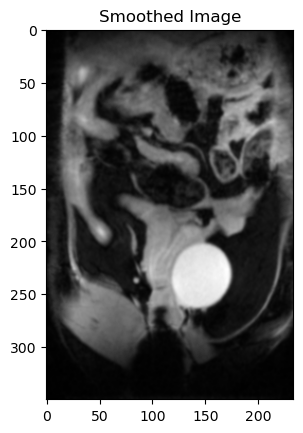

In [16]:
# Perform smoothing
seedImg_smooth = Smoothing.GuassFilter(seed_image_normal2, 5, 1)

#visulalize results
plt.figure()
plt.imshow(seedImg_smooth, cmap = 'gray')
plt.title("Smoothed Image")


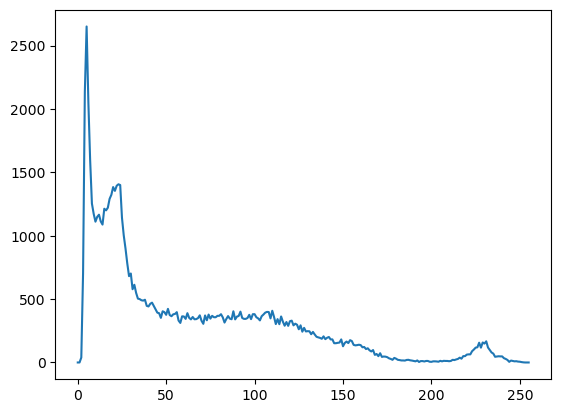

In [17]:
#For debugging. Check histogram vals to see the distribution of pixels

#convert to CV_8U format
img_8U = cv2.convertScaleAbs(seedImg_smooth)

hist = cv2.calcHist([img_8U], [0], None, [256], [0, 256])
plt.plot(hist)


# Perform Otsu Thresholding

76.0


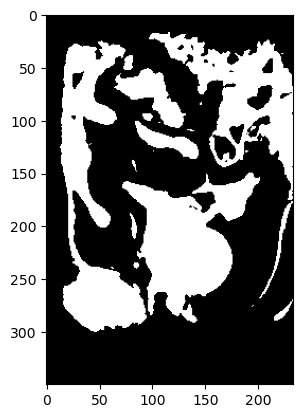

In [18]:
#Perform the thresholding
OtsuVal, Otsuthresh = Otsu_Thresh.Otsu(seedImg_smooth, 50)
print(OtsuVal)

plt.figure()
plt.imshow(Otsuthresh, cmap = 'gray')

# Connected Component Analysis

Number of labels components: 22


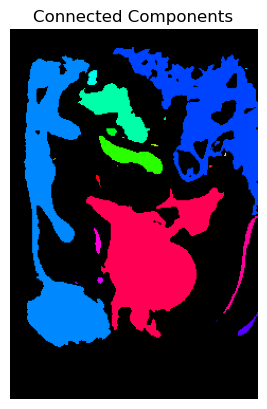

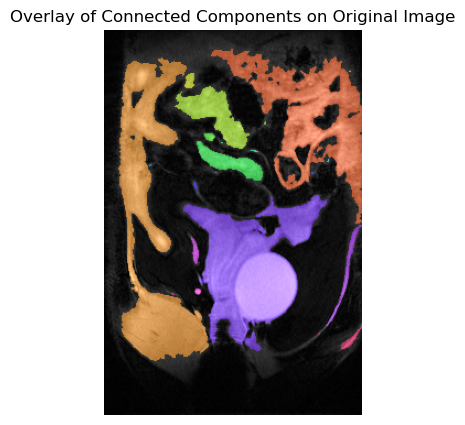

In [ ]:
#Apply connected component analysis and get 4 tuple

num_labels, labels_im = Connected_Comp_Anal.Conn_Comp_Anal(Otsuthresh)

print(f"Number of labels components: {num_labels-1}")

#Visualize Connected components
label_hue = np.uint8(179 * labels_im / np.max(labels_im))
blank_ch = 255 * np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
labeled_img[label_hue == 0] = 0  # Set background to black

plt.imshow(labeled_img)
plt.title("Connected Components")
plt.axis("off")
plt.show()


#Overlay connected components on image
seed_image2_color = cv2.cvtColor(seed_image_normal2, cv2.COLOR_GRAY2BGR)

overlay = cv2.addWeighted(seed_image2_color,0.7, labeled_img, 0.5, 0)

# Show
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.title("Overlay of Connected Components on Original Image")
plt.axis('off')
plt.show()


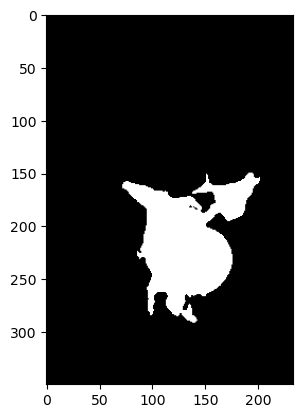

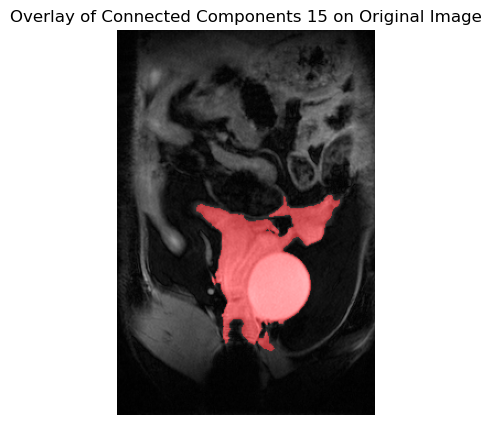

In [44]:
#Extract All the connected component analysis elements

components = []


for label in range(1,num_labels): 
    component = np.zeros(Otsuthresh.shape)
    component[labels_im==label] = 255
    components.append(component)
    

#plot component fifteen for the bladder and uterus component
plt.figure()
plt.imshow(components[15], cmap='gray')

#Visualize connected component 15
label_hue2 = np.uint8(179 * components[15] / np.max(components[15]))
blank_ch2 = 255 * np.ones_like(label_hue2)
labeled_Component = cv2.merge([label_hue2, blank_ch2, blank_ch2])
labeled_Component = cv2.cvtColor(labeled_Component, cv2.COLOR_HSV2BGR)
labeled_Component[label_hue2 == 0] = 0  # Set background to black


overlay_comp15 = cv2.addWeighted(seed_image2_color,0.7, labeled_Component, 0.5, 0)

# Show
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(overlay_comp15, cv2.COLOR_BGR2RGB))
plt.title("Overlay of Connected Components 15 on Original Image")
plt.axis('off')
plt.show()


